In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import LabelEncoder

In [2]:
path = "./collected_data/original_data"
dir_list = os.listdir(path)
print(dir_list)

['data_LI_t0.csv', 'data_LI_t1.csv', 'data_LI_t10.csv', 'data_LI_t100.csv', 'data_LI_t101.csv', 'data_LI_t102.csv', 'data_LI_t103.csv', 'data_LI_t104.csv', 'data_LI_t105.csv', 'data_LI_t106.csv', 'data_LI_t107.csv', 'data_LI_t108.csv', 'data_LI_t109.csv', 'data_LI_t11.csv', 'data_LI_t110.csv', 'data_LI_t111.csv', 'data_LI_t112.csv', 'data_LI_t113.csv', 'data_LI_t114.csv', 'data_LI_t115.csv', 'data_LI_t116.csv', 'data_LI_t117.csv', 'data_LI_t118.csv', 'data_LI_t119.csv', 'data_LI_t12.csv', 'data_LI_t120.csv', 'data_LI_t121.csv', 'data_LI_t122.csv', 'data_LI_t123.csv', 'data_LI_t124.csv', 'data_LI_t125.csv', 'data_LI_t126.csv', 'data_LI_t127.csv', 'data_LI_t128.csv', 'data_LI_t129.csv', 'data_LI_t13.csv', 'data_LI_t130.csv', 'data_LI_t131.csv', 'data_LI_t132.csv', 'data_LI_t133.csv', 'data_LI_t134.csv', 'data_LI_t135.csv', 'data_LI_t136.csv', 'data_LI_t137.csv', 'data_LI_t138.csv', 'data_LI_t139.csv', 'data_LI_t14.csv', 'data_LI_t140.csv', 'data_LI_t141.csv', 'data_LI_t142.csv', 'data_LI

In [3]:
pd.read_csv(path + "/" + dir_list[0]).head()

,Unnamed: 0,vertices,redexes,redex_depths,redex_indexes,heights,widths,redex_subj_vars,redex_obj_vertices,redex_obj_heights,redex_obj_widths,steps_time
0,0,53,3,4,12,15,21,1,9,5,3,168727
1,1,50,2,5,27,15,20,0,21,10,9,238973
2,2,27,1,1,1,8,10,0,18,7,7,39675
3,3,7,0,-1,-1,3,2,-1,-1,-1,-1,0


# Generate training set (term param before reduction & step time)

In [4]:
all_data = pd.DataFrame(columns=pd.read_csv(path + "/" + dir_list[0]).columns[1:])
all_data["strategy_name"] = None

for file_name in dir_list:
    file_path = path + "/" + file_name
    data = pd.read_csv(file_path)
    data = data[[ri != -1 for ri in data["redex_indexes"]]]
    data = data.drop('Unnamed: 0', axis=1)
    strategy_name = "LO" if "LO" in file_name else "LI"
    data["strategy_name"] = [strategy_name] * len(data)
    all_data = pd.concat([all_data, data]).reset_index(drop=True)

In [5]:
all_data.head()

,vertices,redexes,redex_depths,redex_indexes,heights,widths,redex_subj_vars,redex_obj_vertices,redex_obj_heights,redex_obj_widths,steps_time,strategy_name
0,53,3,4,12,15,21,1,9,5,3,168727,LI
1,50,2,5,27,15,20,0,21,10,9,238973,LI
2,27,1,1,1,8,10,0,18,7,7,39675,LI
3,54,6,7,10,13,17,1,4,3,0,244051,LI
4,51,6,11,16,14,16,1,1,0,0,248576,LI


In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3931 entries, 0 to 3930
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   vertices            3931 non-null   int64 
 1   redexes             3931 non-null   int64 
 2   redex_depths        3931 non-null   int64 
 3   redex_indexes       3931 non-null   int64 
 4   heights             3931 non-null   int64 
 5   widths              3931 non-null   int64 
 6   redex_subj_vars     3931 non-null   int64 
 7   redex_obj_vertices  3931 non-null   int64 
 8   redex_obj_heights   3931 non-null   int64 
 9   redex_obj_widths    3931 non-null   int64 
 10  steps_time          3931 non-null   int64 
 11  strategy_name       3931 non-null   object
dtypes: int64(11), object(1)
memory usage: 368.7+ KB


In [6]:
for col_name in ["vertices", "redexes", "redex_depths", "redex_indexes", "heights", "widths",
                 "redex_subj_vars", "redex_obj_vertices", "redex_obj_heights", "redex_obj_widths",
                 "steps_time",
                 "redex_indexes"]:
    all_data[col_name] = pd.to_numeric(all_data[col_name])

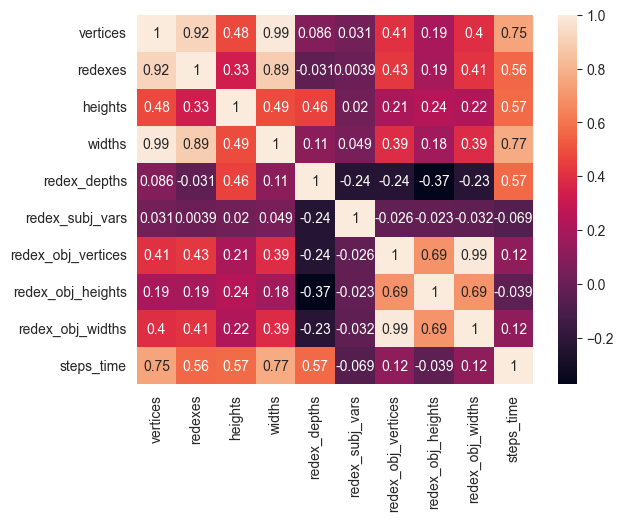

In [7]:
corr_matrix = all_data[["vertices", "redexes", "heights", "widths", "redex_depths", "redex_subj_vars", "redex_obj_vertices", "redex_obj_heights", "redex_obj_widths", "steps_time",]].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
label_encoder = LabelEncoder()
tmp_all_data = all_data.copy(deep=True)
tmp_all_data["strategy_name"] = label_encoder.fit_transform(tmp_all_data["strategy_name"])
tmp_all_data["strategy_name"] = pd.to_numeric(tmp_all_data["strategy_name"])

corr_matrix = tmp_all_data[["vertices", "redexes", "heights", "widths", "redex_depths", "strategy_name", "steps_time",]].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [9]:
all_data.to_csv("./collected_data/prepared_data/prestep_data.csv", index=False)

# Generate training set (term param before reduction & term param after reduction & step time)

In [ ]:
all_data = pd.DataFrame(
    columns=[
        "vertices", "redexes", "heights", "widths",
        "vertices_post", "redexes_post", "heights_post", "widths_post",
        "vertices_diff", "redexes_diff", "heights_diff", "widths_diff",
        "redex_depths", "redex_indexes",
        "steps_time", "strategy_name",
    ]
)
all_data["strategy_name"] = None

for file_name in dir_list:
    file_path = path + "/" + file_name
    data = pd.read_csv(file_path)
    data = data.drop('Unnamed: 0', axis=1)
    strategy_name = "LO" if "LO" in file_name else "LI"

    for inx in range(len(data) - 1):
        data_pre = data.iloc[inx].to_dict()
        data_post = data.iloc[inx + 1].to_dict()
        new_row = {
            "vertices": [data_pre["vertices"]], "redexes": [data_pre["redexes"]],
            "heights": [data_pre["heights"]], "widths": [data_pre["widths"]],

            "vertices_post": [data_post["vertices"]], "redexes_post": [data_post["redexes"]],
            "heights_post": [data_post["heights"]], "widths_post": [data_post["widths"]],

            "vertices_diff": [data_pre["vertices"] - data_post["vertices"]], "redexes_diff": [data_pre["redexes"] - data_post["redexes"]],
            "heights_diff": [data_pre["heights"] - data_post["heights"]], "widths_diff": [data_pre["widths"] - data_post["widths"]],

            "redex_depths": [data_pre["redex_depths"]], "redex_indexes": [data_pre["redex_indexes"]],
            "steps_time": [data_pre["steps_time"]], "strategy_name": [strategy_name],
        }
        all_data = pd.concat([all_data, pd.DataFrame(new_row)], ignore_index=True).reset_index(drop=True)

In [ ]:
all_data.head()

In [ ]:
for col_name in [
    "vertices", "redexes", "heights", "widths",
    "vertices_post", "redexes_post", "heights_post", "widths_post",
    "vertices_diff", "redexes_diff", "heights_diff", "widths_diff",
    "redex_depths", "redex_indexes",
    "steps_time",
]:
    all_data[col_name] = pd.to_numeric(all_data[col_name])

In [ ]:
all_data.to_csv("./collected_data/prepared_data/pre_and_post_step_data.csv", index=False)

In [ ]:
corr_matrix = all_data.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
tmp_all_data = all_data.copy(deep=True)
tmp_all_data["strategy_name"] = label_encoder.fit_transform(tmp_all_data["strategy_name"])
tmp_all_data["strategy_name"] = pd.to_numeric(tmp_all_data["strategy_name"])

corr_matrix = tmp_all_data.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
tmp_all_data["strategy"] = tmp_all_data["strategy_name"]

In [ ]:
corr_matrix = tmp_all_data[["vertices", "redexes", "heights", "widths", "redex_depths", "strategy", "steps_time",]].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
corr_matrix = tmp_all_data[["vertices_post", "redexes_post", "heights_post", "widths_post", "redex_depths", "strategy", "steps_time",]].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
corr_matrix = tmp_all_data[["vertices_diff", "redexes_diff", "heights_diff", "widths_diff", "redex_depths", "strategy", "steps_time",]].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
corr_matrix = tmp_all_data[["vertices_post", "redexes_post", "heights_post", "widths_post", "vertices_diff", "redexes_diff", "heights_diff", "widths_diff", "redex_depths", "strategy", "steps_time",]].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
data_diff = pd.DataFrame()

for col_name in ["vertices", "redexes", "heights", "widths"]:
    data_pre = list(all_data[col_name + "_pre"])
    data_post = list(all_data[col_name + "_post"])
    data_diff[col_name + "_dif"] = [dpr - dpo for dpr, dpo in zip (data_pre, data_post)]

data_diff["redex_depths"] = all_data["redex_depths"]
data_diff["redex_indexes"] = all_data["redex_indexes"]
data_diff["steps_time"] = all_data["steps_time"]
data_diff["strategy_name"] = all_data["strategy_name"]

In [ ]:
tmp_all_data = data_diff.copy(deep=True)
tmp_all_data["strategy_name"] = label_encoder.fit_transform(tmp_all_data["strategy_name"])
tmp_all_data["strategy_name"] = pd.to_numeric(tmp_all_data["strategy_name"])

corr_matrix = tmp_all_data.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
data_diff.to_csv("./collected_data/prepared_data/diff_step_data.csv", index=False)